In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_final = pd.read_csv('/content/drive/My Drive/flight fare prediction_/Flight fare prediction MH dataset-kaggle/Train_final.csv')
test_final = pd.read_csv('/content/drive/My Drive/flight fare prediction_/Flight fare prediction MH dataset-kaggle/Test_final.csv')
x_train = pd.read_csv('/content/drive/My Drive/flight fare prediction_/x and y data/x_train.csv')
y_train = pd.read_csv('/content/drive/My Drive/flight fare prediction_/x and y data/y_train.csv')


In [3]:
x_train.head()

,Unnamed: 0,Total_Stops,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi,duration_hour,duration_min,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,June,March,May
0,0,0.0,22.0,20.0,1.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2.0,5.0,50.0,13.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,2.0,9.0,25.0,4.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,18.0,5.0,23.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,16.0,50.0,21.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
x_train.drop('Unnamed: 0', axis =1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)


## Feature Selection


In [5]:
train_final.columns

Index(['Unnamed: 0', 'Total_Stops', 'Price', 'Departure_hour', 'Departure_min',
       'Arrival_hour', 'Arrival_min', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi',
       'duration_hour', 'duration_min', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'June', 'March', 'May'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[2.63969503e-01 3.90911185e-02 2.60537046e-02 3.79089902e-02
 2.33407423e-02 1.34054268e-02 1.84522825e-03 1.85003672e-02
 1.56261260e-01 6.95095670e-02 2.37047839e-02 6.77683239e-04
 3.23375232e-03 5.53264099e-03 1.08704565e-04 4.68783024e-04
 1.19465538e-02 2.27490115e-03 9.12832069e-03 1.56979685e-02
 1.89654971e-02 7.14024629e-03 5.95113882e-04 2.41695356e-02
 6.52957094e-02 2.40503428e-02 1.07396517e-02 1.39552108e-02
 1.81739080e-02 2.57048792e-02 9.73687952e-03 1.34940993e-02
 8.74626917e-03 2.68196958e-02 9.75296099e-03]


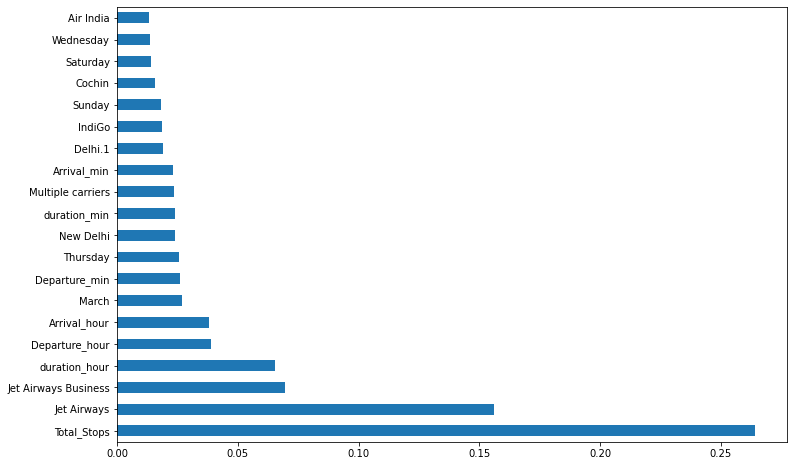

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train,y_train)

print(selection.feature_importances_)



plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Building Model

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.25)

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
y_pred = model.predict(x_test)

In [11]:
model.score(x_train, y_train)

0.9258122868189533

In [12]:
model.score(x_test, y_test)

0.7580061051141833

In [13]:
from sklearn import metrics

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared score:", metrics.r2_score(y_test, y_pred))

MAE: 1401.2287978350012
MSE: 5307019.565456814
RMSE: 2303.696934376745
R-squared score: 0.7580061051141833


In [15]:
import pickle

In [16]:
pkl_filename = 'fare_prediction.pkl'

In [17]:
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

## Trying other model along with fine-tuning

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [20]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
y_pred_kneighbor = knn_regressor.predict(x_test)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_kneighbor))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_kneighbor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_kneighbor)))
print("R-squared score:", metrics.r2_score(y_test, y_pred_kneighbor))

MAE: 2001.9116435791839
MSE: 11947516.030058298
RMSE: 3456.517905357688
R-squared score: 0.4552072208017819


In [24]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
y_pred_randomforest = random_regressor.predict(x_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_randomforest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_randomforest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_randomforest)))
print("R-squared score:", metrics.r2_score(y_test, y_pred_randomforest))

MAE: 1339.941563639266
MSE: 4763728.639239081
RMSE: 2182.5967651490464
R-squared score: 0.7827795369189774


In [27]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[10:05:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [28]:
y_pred_boost = model.predict(x_test)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_boost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_boost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_boost)))
print("R-squared score:", metrics.r2_score(y_test, y_pred_boost))

MAE: 1479.303365658125
MSE: 4855862.420889784
RMSE: 2203.6021466884135
R-squared score: 0.7785783440653962
